# Practice notebook for confidence intervals using NHANES data

This notebook will give you the opportunity to practice working with confidence intervals using the NHANES data.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

da = pd.read_csv("../DataFiles/nhanes_2015_2016.csv")

## Question 1

Restrict the sample to women between 35 and 50, then use the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to partition this sample into two groups - women who are currently married, and women who are not currently married.  Within each of these groups, calculate the proportion of women who have completed college.  Calculate 95% confidence intervals for each of these proportions.

In [10]:
# Subset to Women in the Desired Age Group
da_wmn_35_50 = da.loc[(da['RIDAGEYR'] >= 35) & (da['RIDAGEYR'] <= 50) & (da['RIAGENDR'] == 2)]
da_wmn_35_50[['DMDMARTL', 'RIDAGEYR', 'RIAGENDR']].head(10)

,DMDMARTL,RIDAGEYR,RIAGENDR
4,3.0,42,2
34,1.0,37,2
50,1.0,39,2
52,4.0,50,2
55,1.0,45,2
58,5.0,44,2
61,1.0,37,2
62,1.0,49,2
63,1.0,46,2
76,1.0,42,2


In [11]:
## 1 is married all else is not 
da_wmn_35_50_married = da_wmn_35_50.loc[da_wmn_35_50['DMDMARTL'] == 1]
da_wmn_35_50_unmarried = da_wmn_35_50.loc[da_wmn_35_50['DMDMARTL'] != 1]
print(len(da_wmn_35_50_married), len(da_wmn_35_50_unmarried), len(da_wmn_35_50))

449 338 787


In [12]:
# Within each of these groups, calculate the proportion of women who have completed college (5 = College Graduate or Above)
education_counts_married = da_wmn_35_50_married['DMDEDUC2'].value_counts()
display(education_counts_married)
# Need to get the value from the loc series return of the index value for the education count value of interest
ed_perc_married_clg = education_counts_married.loc[education_counts_married.index == 5].values[0] / education_counts_married.sum()
print(ed_perc_married_clg)

ed_counts_ntmarried = da_wmn_35_50_unmarried['DMDEDUC2'].value_counts()
display(ed_counts_ntmarried)
ed_perc_ntmarried_clg = ed_counts_ntmarried.loc[ed_counts_ntmarried.index == 5].values[0] / ed_counts_ntmarried.sum()
print(ed_perc_ntmarried_clg, '\n')

print("Percentage of married women aged (35-50) who have completed college : {}%".format(round(100 * ed_perc_married_clg,2)))
print("Percentage of unmarried women aged (35-50) who have completed college : {}%".format(round(100 * ed_perc_ntmarried_clg,2)))


5.0    162
4.0    139
3.0     64
2.0     43
1.0     41
Name: DMDEDUC2, dtype: int64

0.36080178173719374


4.0    118
5.0     72
3.0     69
1.0     42
2.0     37
Name: DMDEDUC2, dtype: int64

0.21301775147928995 

Percentage of married women aged (35-50) who have completed college : 36.08%
Percentage of unmarried women aged (35-50) who have completed college : 21.3%


In [13]:
# Calculate 95% confidence intervals for each of these proportions.
import statsmodels.api as sm
## Just using the 162 of the value of the index of 5 for proportion above
married_col_cnfintv = sm.stats.proportion_confint(162, education_counts_married.sum())
display(married_col_cnfintv, married_col_cnfintv[1] - married_col_cnfintv[0])
nmarried_col_cnfintv = sm.stats.proportion_confint(72, ed_counts_ntmarried.sum())
display(nmarried_col_cnfintv, nmarried_col_cnfintv[1] - nmarried_col_cnfintv[0])

(0.31638193710753626, 0.4052216263668512)

0.08883968925931496

(0.16936816767089768, 0.2566673352876822)

0.08729916761678452

In [14]:
# Difference in Proportion Confidence Interval
import numpy as np
p_hat1 = ed_perc_married_clg
p_hat2 = ed_perc_ntmarried_clg

d_proportions_top = p_hat1 - p_hat2 + 1.96 * np.sqrt(((p_hat1 * (1 - p_hat1)) / education_counts_married.sum()) + (p_hat2 * (1 - p_hat2) / ed_counts_ntmarried.sum()))
d_proportions_bottom = p_hat1 - p_hat2 - 1.96 * np.sqrt(((p_hat1 * (1 - p_hat1)) / education_counts_married.sum()) + (p_hat2 * (1 - p_hat2) / ed_counts_ntmarried.sum()))

print(d_proportions_bottom, d_proportions_top)


0.08550601406567257 0.21006204645013501


In [15]:
## Married Confidence intervals Manual
lcb = ed_perc_married_clg - 1.96 * np.sqrt(ed_perc_married_clg * (1 - ed_perc_married_clg) / education_counts_married.sum())  
ucb = ed_perc_married_clg + 1.96 * np.sqrt(ed_perc_married_clg * (1 - ed_perc_married_clg) / education_counts_married.sum())  
print(lcb, ucb)

0.3163811208674688 0.4052224426069187


__Q1a.__ Identify which of the two confidence intervals is wider, and explain why this is the case. 

* They're super tight in terms of the intervals lower and upper bounds. The slightly larger interval appears to be the married interval. This could be do to the larger sample size with potentially more influential outliers

__Q1b.__ Write 1-2 sentences summarizing these findings for an audience that does not know what a confidence interval is (the goal here is to report the substance of what you learned about how marital status and educational attainment are related, not to teach a person what a confidence interval is).

* With 95% confidence, the population proportion of married women who have completed a college degree is 8.6% to 21.1% higher than the population proportion of unmarried women who have completed a college degree.

## Question 2

Construct a 95% confidence interval for the proportion of smokers who are female. Construct a 95% confidence interval for the proportion of smokers who are male. Construct a 95% confidence interval for the **difference** between those two gender proportions.

In [16]:
df_q2 = da.copy()
print(len(df_q2), len(da), '\n')
print(df_q2['SMQ020'].value_counts(), '\n')
print(df_q2['RIAGENDR'].value_counts())

5735 5735 

2    3406
1    2319
9       8
7       2
Name: SMQ020, dtype: int64 

2    2976
1    2759
Name: RIAGENDR, dtype: int64


* The smoker values of (2, 1, 9, 7) represent No, Yes, Refused, & Don't Know
* With only 10 responses being for the two non binary answers (for smoking), we'll simply exclude them
* Next, we'll map the values to a crosstab representation showing the Yes/No response for Smoking for Each Gender

In [17]:
import pandas as pd
df_q2['Gender'] = df_q2['RIAGENDR'].map({1: 'Male', 2: 'Female'})
df_q2['Smoker'] = df_q2['SMQ020'].map({1: 'Yes', 2: 'No'})
cat_smoke_counts = pd.crosstab(df_q2.Gender, df_q2.Smoker)
cat_smoke_counts

Smoker,No,Yes
Gender,,
Female,2066,906
Male,1340,1413


In [18]:
# Get Yes percentage for each index/row and divide by the sum of total rows for index
p_smoker_female = cat_smoke_counts.loc['Female', 'Yes'] / cat_smoke_counts.loc['Female', :].sum()
p_smoker_male = cat_smoke_counts.loc['Male', 'Yes'] / cat_smoke_counts.loc['Male', :].sum()
print(p_smoker_female)
print(p_smoker_male)
# print(cat_smoke_counts.loc['Female', :]) return is the series for that row with each column as value in the returned series

0.30484522207267833
0.5132582637123139


In [19]:
## Calculate confidence intervals for each group
# married_col_cnfintv = sm.stats.proportion_confint(162, education_counts_married.sum())

female_smoker_confintervals = sm.stats.proportion_confint(cat_smoke_counts.loc['Female', 'Yes'], 
                                                          cat_smoke_counts.loc['Female', :].sum())
male_smoker_confintervals = sm.stats.proportion_confint(cat_smoke_counts.loc['Male', 'Yes'], 
                                                          cat_smoke_counts.loc['Male', :].sum())
                                                        
print((female_smoker_confintervals), (male_smoker_confintervals), type(female_smoker_confintervals))

(0.2882949879861214, 0.32139545615923526) (0.49458749263718593, 0.5319290347874418) <class 'tuple'>


In [20]:
# Difference Between Two Gender Proportions Confidence Intervals
lwb_dif = p_smoker_female - p_smoker_male - (1.96 * np.sqrt((p_smoker_female * (1 - p_smoker_female) / cat_smoke_counts.loc['Female', :].sum())+
                                                              (p_smoker_male * (1 - p_smoker_male) / cat_smoke_counts.loc['Male', :].sum())))

hwb_dif = p_smoker_female - p_smoker_male + (1.96 * np.sqrt((p_smoker_female * (1 - p_smoker_female) / cat_smoke_counts.loc['Female', :].sum())+
                                                              (p_smoker_male * (1 - p_smoker_male) / cat_smoke_counts.loc['Male', :].sum())))
(lwb_dif, hwb_dif)

(-0.2333636091471941, -0.18346247413207697)

* We are 95% confident that the interval (-0.2333636091471941, -0.18346247413207697) contains the difference between
    the population of female smokers compared to male smokers in our dataset
* With 95% confidence the population proportion of females who smoke is 23.3% to 18.3% lower than the population
    proportion of male who smoke

__Q2a.__ Why might it be relevant to report the separate gender proportions **and** the difference between the gender proportions?

* Each separate proportion interval is significantly different

__Q2b.__ How does the **width** of the confidence interval for the difference between the gender proportions compare to the widths of the confidence intervals for the separate gender proportions?

* The difference in the confidence interval for the difference between each gender proportion is wider than the two individual levels

## Question 3

Construct a 95% interval for height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)) in centimeters.  Then convert height from centimeters to inches by dividing by 2.54, and construct a 95% confidence interval for height in inches.  Finally, convert the endpoints (the lower and upper confidence limits) of the confidence interval from inches to back to centimeters   

In [21]:
# Initial Confidence Intervals Below are for CM
print(da['BMXHT'].head(1))
height_df = da[['BMXHT']].dropna()
height_df['BMXHT_in'] = height_df['BMXHT'].apply(lambda x: x/2.54) # make sure to drop nulls first or it won't work!
print(height_df.head(), '\n\n', len(height_df), '\n') # just an idea here of what's needed to calculate manually
mean_cm_confinterval_low = height_df['BMXHT'].mean() - 1.9604 * (height_df['BMXHT'].std() / np.sqrt(len(height_df))) 
mean_cm_confinterval_high = height_df['BMXHT'].mean() + 1.9604 * (height_df['BMXHT'].std() / np.sqrt(len(height_df))) 
print((mean_cm_confinterval_low, mean_cm_confinterval_high), '\n')
print('Manual calculations above, method from api library below for confidence interval : 95% for inches', '\n')
print(sm.stats.DescrStatsW(height_df['BMXHT']).zconfint_mean())

0    184.5
Name: BMXHT, dtype: float64
   BMXHT   BMXHT_in
0  184.5  72.637795
1  171.4  67.480315
2  170.1  66.968504
3  160.9  63.346457
4  164.9  64.921260 

 5673 

(165.8804929109529, 166.40517604726972) 

Manual calculations above, method from api library below for confidence interval : 95% for inches 

(165.88055125872887, 166.40511769949427)


In [22]:
# Below Confidence Intervals Below are for inches
mean_in_confinterval_low = height_df['BMXHT_in'].mean() - 1.9604 * (height_df['BMXHT_in'].std() / np.sqrt(len(height_df)))
mean_in_confinterval_high = height_df['BMXHT_in'].mean() + (1.9604 * (height_df['BMXHT_in'].std() / np.sqrt(len(height_df))))
print("Manual calculation for interval 95% low in inches : {}".format(mean_in_confinterval_low))
print("Manual calucation for interval 95% high in inches : {}".format(mean_in_confinterval_high), '\n')
print('Stats package usage below')
print(sm.stats.DescrStatsW(height_df['BMXHT_in']).zconfint_mean())


Manual calculation for interval 95% low in inches : 65.30728067360344
Manual calucation for interval 95% high in inches : 65.5138488375077 

Stats package usage below
(65.30730364516884, 65.51382586594264)


__Q3a.__ Describe how the confidence interval constructed in centimeters relates to the confidence interval constructed in inches.

In [23]:
print(sm.stats.DescrStatsW(height_df['BMXHT_in']).zconfint_mean()[0] * 2.54, 
     sm.stats.DescrStatsW(height_df['BMXHT_in']).zconfint_mean()[1] * 2.54)

165.88055125872887 166.4051176994943


* They look the same as above for inches!

## Question 4

Partition the sample based on 10-year age bands, i.e. the resulting groups will consist of people with ages from 18-28, 29-38, etc. Construct 95% confidence intervals for the difference between the mean BMI for females and for males within each age band.

In [24]:
# enter your code here
print(da.RIDAGEYR.min(), da.RIDAGEYR.max(), '\n') # min max values
subsect_df = da[['RIDAGEYR', 'RIAGENDR', 'BMXBMI']]
subsect_df['agegrps'] = pd.cut(da['RIDAGEYR'], bins=[18, 28, 38, 48, 58, 68, 78, 85])
print(subsect_df.head()) # 2 and 1 the only values for Gender (1 = Male, 2 = Female)

18 80 

   RIDAGEYR  RIAGENDR  BMXBMI   agegrps
0        62         1    27.8  (58, 68]
1        53         1    30.8  (48, 58]
2        78         1    28.8  (68, 78]
3        56         2    42.4  (48, 58]
4        42         2    20.3  (38, 48]


/var/folders/r8/mmfd5rgj7v51_80zhnq8v9zc0000gn/T/ipykernel_2491/3507329659.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsect_df['agegrps'] = pd.cut(da['RIDAGEYR'], bins=[18, 28, 38, 48, 58, 68, 78, 85])


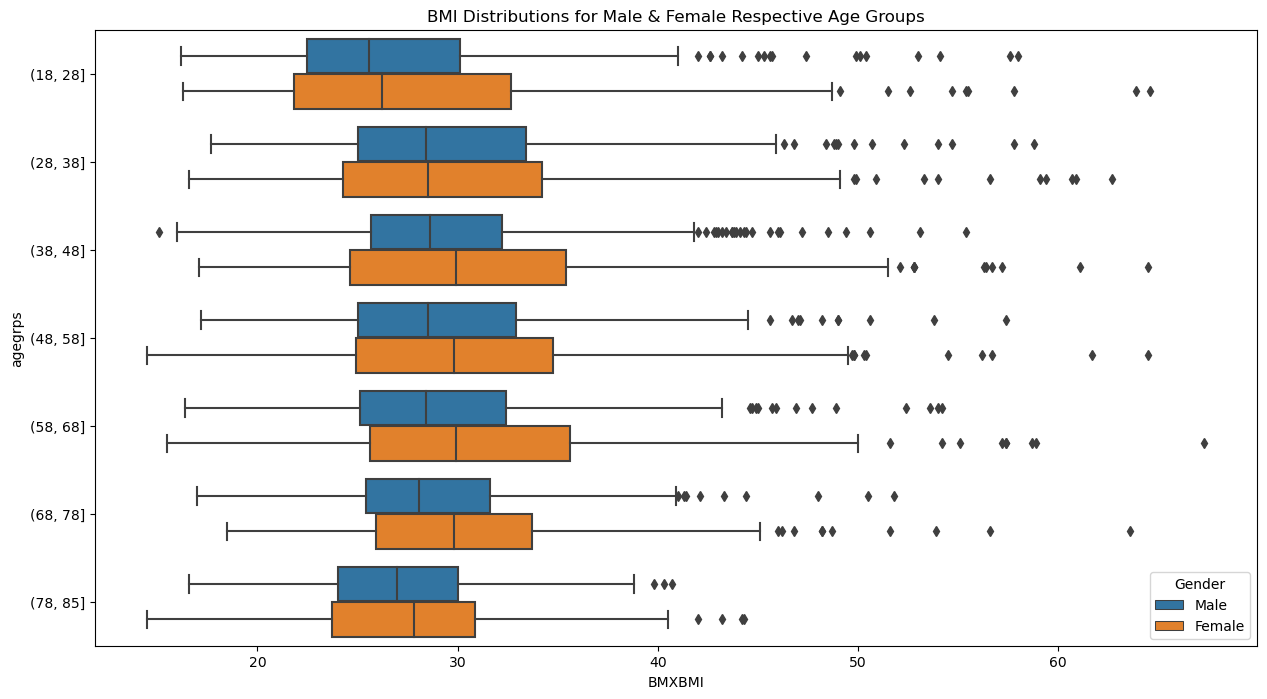

In [25]:
fig, axs = plt.subplots(figsize=(15, 8))
g = sns.boxplot(y=subsect_df["agegrps"], x=subsect_df["BMXBMI"], hue=subsect_df["RIAGENDR"])
handles, labels = g.get_legend_handles_labels()
g.legend(handles, ['Male', 'Female'], loc='lower right', title='Gender')
plt.title('BMI Distributions for Male & Female Respective Age Groups')
plt.show()

In [26]:
# Stack from long to wide
agg_group_stats = subsect_df.groupby(['agegrps', 'RIAGENDR']).agg({'BMXBMI' : [np.mean, lambda x: np.std(x, ddof=1), np.size]}).unstack()
agg_group_stats.columns = ['Male Mean', 'Female Mean', 'Male Std', 'Female Std', 'Male Count', 'Female Count']
agg_group_stats


,Male Mean,Female Mean,Male Std,Female Std,Male Count,Female Count
agegrps,,,,,,
"(18, 28]",27.058186,28.019433,6.679515,8.048854,458,498
"(28, 38]",29.697180,29.943443,6.726690,7.959097,467,494
"(38, 48]",29.514646,31.003733,6.104950,8.044642,398,514
"(48, 58]",29.385132,30.787361,6.151534,7.647590,419,454
"(58, 68]",29.232462,31.054664,5.959024,7.779502,470,466
"(68, 78]",28.720270,30.537818,5.336652,6.780588,307,279
"(78, 85]",27.464368,27.850000,4.695650,5.483781,177,201


In [27]:
# Calculate the SEM for females and for males within each age band
agg_group_stats['SEM_Male'] = agg_group_stats.apply(lambda x: x['Male Std'] / np.sqrt(x['Male Count']), axis=1)
agg_group_stats['SEM_Female'] = agg_group_stats.apply(lambda x: x['Female Std'] / np.sqrt(x['Female Count']), axis=1)

# Calculate the mean difference of BMI between females and males within each age band, also  calculate
# its SE and the lower and upper limits of its 95% CI.
agg_group_stats['mean_diff'] = agg_group_stats.apply(lambda x: x['Male Mean'] - x['Female Mean'], axis=1)
## the standard error for the difference of two means taken from independent samples is sqrt(SE1^2 + SE2^2), 
## where SE1 and SE2 are the standard errors for the two means being compared.
agg_group_stats['sem_diff'] = agg_group_stats.apply(lambda x: np.sqrt(x['SEM_Male'] ** 2 + x['SEM_Female'] ** 2), axis=1)

## Now can calculate a 95% confidence interval for the difference between male bmi - female bmi for each strata
## Use the best estimate our our mean difference for the two means at the strata and use the standard error mean difference to generate the intervals of the mean difference for our population subsets at each age group
agg_group_stats['lcb_diff'] = agg_group_stats.apply(lambda x: x['mean_diff'] - 1.96 * x['sem_diff'], axis=1)
agg_group_stats['ucb_diff'] = agg_group_stats.apply(lambda x: x['mean_diff'] + 1.96 * x['sem_diff'], axis=1)

agg_group_stats


,Male Mean,Female Mean,Male Std,Female Std,Male Count,Female Count,SEM_Male,SEM_Female,mean_diff,sem_diff,lcb_diff,ucb_diff
agegrps,,,,,,,,,,,,
"(18, 28]",27.058186,28.019433,6.679515,8.048854,458,498,0.312113,0.360678,-0.961247,0.476973,-1.896114,-0.026381
"(28, 38]",29.697180,29.943443,6.726690,7.959097,467,494,0.311274,0.358097,-0.246263,0.474473,-1.176230,0.683705
"(38, 48]",29.514646,31.003733,6.104950,8.044642,398,514,0.306014,0.354834,-1.489086,0.468563,-2.407470,-0.570703
"(48, 58]",29.385132,30.787361,6.151534,7.647590,419,454,0.300522,0.358919,-1.402230,0.468120,-2.319745,-0.484714
"(58, 68]",29.232462,31.054664,5.959024,7.779502,470,466,0.274869,0.360378,-1.822202,0.453239,-2.710551,-0.933853
"(68, 78]",28.720270,30.537818,5.336652,6.780588,307,279,0.304579,0.405943,-1.817548,0.507502,-2.812252,-0.822844
"(78, 85]",27.464368,27.850000,4.695650,5.483781,177,201,0.352947,0.386796,-0.385632,0.523624,-1.411936,0.640672


__Q4a.__ How do the widths of these confidence intervals differ?  Provide an explanation for any substantial diferences in the confidence interval widths that you see.

In [28]:
lcb_mean = agg_group_stats['lcb_diff'].mean()
ucb_mean = agg_group_stats['ucb_diff'].mean()
print('The average lower confidence interval has the male BMI mean difference of : {}'.format(lcb_mean))
print('The average higher confidence interval has the male BMI mean difference of : {}'.format(ucb_mean))

The average lower confidence interval has the male BMI mean difference of : -2.10489968423852
The average higher confidence interval has the male BMI mean difference of : -0.2163025451411004


* The female mean is larger in each subset with a mean estimate difference being closest in the (28-38) age groups and (78-85). As such the confidence bands for the difference for the stratified mean of each age & gender group show a wider range as the estimated mean difference grows for each subset.
* On average we can state with 95% confidence that the male BMI difference with females is 2.1 to 0.2 points lower 

## Question 5

Construct a 95% confidence interval for the first and second systolic blood pressure measures, and for the difference between the first and second systolic blood pressure measurements within a subject.

In [30]:
bp_df = da[["BPXSY1", "BPXSY2"]].dropna()
bp_df['diff'] = da['BPXSY1'] - da['BPXSY2']
bp_df.head()

,BPXSY1,BPXSY2,diff
0,128.0,124.0,4.0
1,146.0,140.0,6.0
2,138.0,132.0,6.0
3,132.0,134.0,-2.0
4,100.0,114.0,-14.0


In [32]:
## Do we have the same length of measurements?
print(len(bp_df['BPXSY1']), len(bp_df['BPXSY2'])) # 5369 measurements
## Initial 95% confidence interval for difference in means for first measurements
first_measure_mean = bp_df['BPXSY1'].mean()
print(first_measure_mean, '\n') # https://goodcalculators.com/student-t-value-calculator/ (tstrat calculator)
first_measure_conf_interval_lcb = first_measure_mean - 1.960406 * (bp_df['BPXSY1'].std()/np.sqrt(len(bp_df['BPXSY1'])))
first_measure_conf_interval_ucb = first_measure_mean + 1.960406 * (bp_df['BPXSY1'].std()/np.sqrt(len(bp_df['BPXSY1'])))
print("The lower confidence bound for first measurements : {}".format(str(first_measure_conf_interval_lcb)))
print("The upper confidence bound for first measurements : {}".format(str(first_measure_conf_interval_ucb)))



5369 5369
125.08847085118272 

The lower confidence bound for first measurements : 124.59367562587789
The upper confidence bound for first measurements : 125.58326607648755


In [33]:
#print(len(bp_df['BPXSY1']), len(bp_df['BPXSY2'])) # 5369 measurements
## Initial 95% confidence interval for difference in means for second measurements
second_measure_mean = bp_df['BPXSY2'].mean()
print(second_measure_mean, '\n') # https://goodcalculators.com/student-t-value-calculator/ (tstrat calculator)
first_measure_conf_interval_lcb = second_measure_mean - 1.960406 * (bp_df['BPXSY2'].std()/np.sqrt(len(bp_df['BPXSY2'])))
first_measure_conf_interval_ucb = second_measure_mean + 1.960406 * (bp_df['BPXSY2'].std()/np.sqrt(len(bp_df['BPXSY2'])))
print("The lower confidence bound for first measurements : {}".format(str(first_measure_conf_interval_lcb)))
print("The upper confidence bound for first measurements : {}".format(str(first_measure_conf_interval_ucb)))


124.41348482026449 

The lower confidence bound for first measurements : 123.92677560471144
The upper confidence bound for first measurements : 124.90019403581753


In [35]:
# Non manual calculation
first_measure_intervals95cis = sm.stats.DescrStatsW(bp_df['BPXSY1']).zconfint_mean()
print(first_measure_intervals95cis, '95% confidence intervals for mean of first measurements')
second_measure_intervals95cis = sm.stats.DescrStatsW(bp_df['BPXSY2']).zconfint_mean()
print(second_measure_intervals95cis, '95% confidence intervals for mean of second measurements')


(124.59378718804363, 125.5831545143218) 95% confidence intervals for mean of first measurements
(123.92688534371334, 124.90008429681563) 95% confidence intervals for mean of second measurements


In [39]:
# the difference between the first and second systolic blood pressure measurements within a subject
# so we need to estimate the difference in our two population means w/confidence 
sem_first_measure = bp_df['BPXSY1'].std() / np.sqrt(len(bp_df['BPXSY1']))
sem_second_measure = bp_df['BPXSY2'].std() / np.sqrt(len(bp_df['BPXSY2']))
print(sem_first_measure, ': first measure standard error.', sem_second_measure, ': second measure standard error.') # standard errors of individual measures along

sem_diff_two_means = np.sqrt((sem_first_measure ** 2) + (sem_second_measure ** 2))
print(sem_diff_two_means, ': standard error for difference in two measurement means')

0.25239426185434216 : first measure standard error. 0.24826960106888377 : second measure standard error.
0.3540348262980648 : standard error for difference in two measurement means


In [42]:
# agg_group_stats['lcb_diff'] = agg_group_stats.apply(lambda x: x['mean_diff'] - 1.96 * x['sem_diff'], axis=1)
# agg_group_stats['ucb_diff'] = agg_group_stats.apply(lambda x: x['mean_diff'] + 1.96 * x['sem_diff'], axis=1)
print(bp_df['diff'].mean(), bp_df['diff'].std())

## Mean Difference Confidence Interval for Paired Data
ninety_five_difference_mean_ci_lb = bp_df['diff'].mean() - (1.960406 * (bp_df['diff'].std() / np.sqrt(len(bp_df['diff']))))
ninety_five_difference_mean_ci_ub = bp_df['diff'].mean() + (1.960406 * (bp_df['diff'].std() / np.sqrt(len(bp_df['diff']))))
print(ninety_five_difference_mean_ci_lb, ninety_five_difference_mean_ci_ub)

0.6749860309182343 5.046465367896533
0.5399696016261031 0.8100024602103655


* With 95% confidence, we can estimate the mean difference between first and second systolic measurements are between .54 & .81 less in our avaialbe data

__Q5a.__ Based on these confidence intervals, would you say that a difference of zero between the population mean values of the first and second systolic blood pressure measures is consistent with the data?

* No I would not. The difference in means between the two measurements skews lower with our expected difference for the population parameter between each measurement falling between .54 to .81 less on our second measurement

__Q5b.__ Discuss how the width of the confidence interval for the within-subject difference compares to the widths of the confidence intervals for the first and second measures.

* The width of the within-subject difference is smaller and appears to show a trend where the confidence intervals for each measurement has more wiggle room and observed variance than the trend in the difference being a tighter band but more noticeable trend 

## Question 6

Construct a 95% confidence interval for the mean difference between the average age of a smoker, and the average age of a non-smoker.

In [ ]:
# insert your code here

__Q6a.__ Use graphical and numerical techniques to compare the variation in the ages of smokers to the variation in the ages of non-smokers.  

In [1]:
# insert your code here

__Q6b.__ Does it appear that uncertainty about the mean age of smokers, or uncertainty about the mean age of non-smokers contributed more to the uncertainty for the mean difference that we are focusing on here?